## Exploratory Data Analysis of African Influencers
<!--  for Nike Inc Proposed Social Media Marketing Campaign-->
- #### Twitter users segmentation

#### Table of Content

<html>
    
<ul> 
 <li> <a href="#abs">Abstract</a></li>
 <li> <a href= "#obj">Objective</a> </li>
 <li> <a href ="#rq">Research Questions </a> </li>
 <li> <a href="#dw">Data Wrangling</a> </li>
 <li> <a href="#ana">Analysis</a></li>
    <ol>
        <li><a href = "#r1">Research Question 1</a></li>
        <li><a href = "#r2">Research Question 2</a></li>
        <li><a href = "#r3">Research Question 3</a></li>
    </ol>
 <li> <a href = "#gi">General Insights</a></li>   
 <li> <a href = "#rc">Recommendations & Conclusion</a></li>
 <li> <a href = "#lim">Limitations</a></li>
 <li> <a href= "#ref">References</a> </li>
</ul>
    <a id="top"></a>
</html>

<a id="abs"></a>

### Abstract

<a id="obj"></a>
### Objective

<a id="rq"></a>
### Research Questions

#### The Reserach Question are formed in reference to the objective of this Analytic effort: 
####  `Nike Expanding to Africa` 

- Reserch Question 1:
        
    >  Who are the Top Influencers & what are thier  Attributes:
    
     > a. Who are the top 10 non-governmental Influencers ?
        
     > b. What african government have more influence (top 10) ? 
     
     > c. Among the top influencers, is there a corellation between:
     
  -         retweets and mentions 
  -         indegree and retweets
  -         indegree and mentions
     
    
- Research Question 2:

    > Popular narratives among theses influencers (governmental & non-governmental) :
    
    > a. What are the top 10 retweets of these influecers ?
    
    > b. What are the top 5 (most popular) hahstags used in these retweets ?
     
    
- Research Question 3:

    > Spatial & Temporal setting of influencers:
    
    > a. What profession/domain is most popular among the non-government influencers
    
    > b. What is the average age of these influencers account? 
    
    > c. Is there a corellation between account age and popularity score, reach score amd relevance score
    
 
 

<a id="dw"></a>
### Data Wrangling

> Import Libraries

In [416]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, rankdata
%matplotlib inline

#### Gather Data
> Load Datasets

>> Tweet Info

>>> Africa Govt. Covid19 Response Tweet Info

In [417]:
govtRes = pd.read_csv('twitter_datasets/acct_info/afriqGovCovid19Resp.csv')

>>> Africa Influencers Tweet Info

In [418]:
afriqInf = pd.read_csv('twitter_datasets/acct_info/afriqTopInfluencers.csv')

>> Hashtags Info

>>> Africa Govt. Covid19 Response Hashtags

In [419]:
govtResHash = pd.read_csv('twitter_datasets/acct_hashtags/govtHashtags.csv')

>>> Africa Influencers Hashtags

In [420]:
afriqInfHash = pd.read_csv('twitter_datasets/acct_hashtags/afriqInfHashtags.csv')

#### Assessment & Cleaning

> Assess data for quality and structural issues

>> Tweet Info datasets

In [421]:
govtResCopy = govtRes.copy()

In [422]:
govtResCopy.head()

,Unnamed: 0,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,0,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503
2,0,2515899612,Hage G. Geingob,hagegeingob,President of the Republic of Namibia,1085,55,192187,2247,0,3,1,13081,1641
3,0,1239872615248015361,Seychelles Ministry of Finance,FinanceSC,"Ministry of Finance, Trade, Investment and Eco...",124,224,126,122,1,0,0,10,1
4,0,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,This is the official Twitter page of The Presi...,18848,14,1597660,4078,4,73,123,25153,11990


In [423]:
govtResCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        42 non-null     int64 
 1   id                42 non-null     int64 
 2   name              42 non-null     object
 3   screen_name       42 non-null     object
 4   description       40 non-null     object
 5   statuses_count    42 non-null     int64 
 6   friends_count     42 non-null     int64 
 7   followers_count   42 non-null     int64 
 8   account_age_days  42 non-null     int64 
 9   avg_daily_tweets  42 non-null     int64 
 10  hashtags          42 non-null     int64 
 11  user_mentions     42 non-null     int64 
 12  favorite_count    42 non-null     int64 
 13  retweet_count     42 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 4.7+ KB


>> Drop column `unnamed`

In [424]:
govtResCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [425]:
govtResCopy.head()

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503
2,2515899612,Hage G. Geingob,hagegeingob,President of the Republic of Namibia,1085,55,192187,2247,0,3,1,13081,1641
3,1239872615248015361,Seychelles Ministry of Finance,FinanceSC,"Ministry of Finance, Trade, Investment and Eco...",124,224,126,122,1,0,0,10,1
4,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,This is the official Twitter page of The Presi...,18848,14,1597660,4078,4,73,123,25153,11990


> Check for duplicates

In [426]:
govtResCopy.duplicated().any()

False

> There are no duplicate rows

> THe data is clean and fit for analysis

In [427]:
afriqInfCopy = afriqInf.copy()

In [428]:
afriqInfCopy.head()

,Unnamed: 0,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,0,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190
2,0,72013267,Scapegoat,AndiMakinana,In pursuit of scoops. I do not write headlines...,142223,2839,101246,3967,35,39,626,19466,398095
3,0,625489039,Africa Check,AfricaCheck,Africa's first independent fact-checking websi...,27317,4590,68061,2936,9,156,205,1353,1398
4,0,401520924,James Copnall,JamesCopnall,BBC reporter + presenter. Author A Poisonous T...,19434,5046,21958,3182,6,19,82,139,47608


In [429]:
afriqInfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        93 non-null     int64 
 1   id                93 non-null     int64 
 2   name              93 non-null     object
 3   screen_name       93 non-null     object
 4   description       89 non-null     object
 5   statuses_count    93 non-null     int64 
 6   friends_count     93 non-null     int64 
 7   followers_count   93 non-null     int64 
 8   account_age_days  93 non-null     int64 
 9   avg_daily_tweets  93 non-null     int64 
 10  hashtags          93 non-null     int64 
 11  user_mentions     93 non-null     int64 
 12  favorite_count    93 non-null     int64 
 13  retweet_count     93 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 10.3+ KB


> drop column `Unnamed: 0`

In [430]:
afriqInfCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [431]:
afriqInfCopy.head()

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190
2,72013267,Scapegoat,AndiMakinana,In pursuit of scoops. I do not write headlines...,142223,2839,101246,3967,35,39,626,19466,398095
3,625489039,Africa Check,AfricaCheck,Africa's first independent fact-checking websi...,27317,4590,68061,2936,9,156,205,1353,1398
4,401520924,James Copnall,JamesCopnall,BBC reporter + presenter. Author A Poisonous T...,19434,5046,21958,3182,6,19,82,139,47608


In [432]:
afriqInfCopy.duplicated().any()

False

> There are no duplicates

> The data is clean and fir for analysis

#### Load Hahstag Info Datasets

In [433]:
govtResHashCopy = govtResHash.copy()

In [434]:
govtResHashCopy.head()

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1


In [435]:
govtResHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8092 non-null   int64 
 1   hashtags        8092 non-null   object
 2   id              8092 non-null   int64 
 3   name            8092 non-null   object
 4   screen_name     8092 non-null   object
 5   hashtags_count  8092 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 379.4+ KB


> Drop `Unnamed: 0` column

In [436]:
govtResHashCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [437]:
govtResHashCopy

,hashtags,id,name,screen_name,hashtags_count
0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1
...,...,...,...,...,...
8087,nomination,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8088,parlement,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8089,sacrifice,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8090,vœux,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1


In [438]:
govtResHashCopy.duplicated().any()

False

> There are no duplicates

<!-- > To make the tables more normalised, we need to join the info tables to thier respective hashtag tables -->

In [439]:
afriqInfHashCopy = afriqInfHash.copy()

In [440]:
afriqInfHashCopy.head()

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,4,Adani,305125998,Jeffrey Gettleman,gettleman,1


In [441]:
afriqInfHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25372 entries, 0 to 25371
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      25372 non-null  int64 
 1   hashtags        25372 non-null  object
 2   id              25372 non-null  int64 
 3   name            25372 non-null  object
 4   screen_name     25372 non-null  object
 5   hashtags_count  25372 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


> drop column `Unnamed: 0`

In [442]:
afriqInfHashCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [443]:
afriqInfHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1


In [444]:
afriqInfHashCopy.duplicated().any()

False

<a id="ana"></a>

### Analysis

<a id="r1"></a>

#### Research Question 1: 



> Who are the Top Influencers & what are thier  Attributes:

>   a. Who are the top 10 non-governmental Influencers ?

>    b. What african government have more influence (top 10) ?

>    c. Among the top influencers, is there a corellation between:

 -         retweets and mentions 
 -         indegree and retweets
 -         indegree and mentions
     

- In determing influence across board, these metrics have to be calcuated:

1. Popularity = likes + retweets

2. Reach = followers - foollowing

3. Relevance = number of mentions

`NB:` We would give more emphasis to Popularity and Relevance metric to avoid the million follower fallacy
    
<a href="http://twitter.mpi-sws.org/icwsm2010_fallacy.pdf">million follower fallacy<a/>

> First we need to drop inactive accounts, with tweets less than 5

>> tweet count in our dataset is statuses_count

> Govt Accunt data

In [445]:
govtResCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count


> The datasets for African government has no inactive users

> Influencers Account data

In [446]:
afriqInfCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
7,874203101108023296,SEO Expert Vancouver,stateafrica,NaN,1,0,8,1131,0,0,0,1,0
26,1124706854628671490,T.I.A,ThisisAfrica,T.I.A,0,0,6,439,0,0,0,0,0
72,3997935917,SmithInAfrica,SmithInAfrica,NaN,1,0,69,1732,0,0,2,0,1


> In our influencers dataset, we have some accounts with tweets less than 5.
> Hence they would be dropped

In [447]:
inactiveInf = afriqInfCopy.query('statuses_count < 5')

In [448]:
afriqInfCopy.drop(inactiveInf.index, axis=0, inplace=True)

> Let's confirm they were  dropped

In [449]:
afriqInfCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count


> THey were dropped

> We also have to drop these users in our influencers hashtag table

In [450]:
users_to_drop = inactiveInf.name.to_list()
users_to_drop

['SEO Expert Vancouver', 'T.I.A', 'SmithInAfrica']

In [451]:
afriqInfHashCopy[afriqInfHashCopy.name.str.contains('SEO Expert Vancouver | T.I.A | SmithInAfrica')]

,hashtags,id,name,screen_name,hashtags_count


In [452]:
users_to_drop=afriqInfHashCopy[afriqInfHashCopy.name.str.contains('SEO Expert Vancouver | T.I.A | SmithInAfrica')].index

In [453]:
afriqInfHashCopy.drop(users_to_drop, axis=0, inplace=True)

In [454]:
afriqInfHashCopy

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1
...,...,...,...,...,...
25367,youthemployment,140003488,IFC Africa,IFCAfrica,1
25368,zambia,140003488,IFC Africa,IFCAfrica,1
25369,économie,140003488,IFC Africa,IFCAfrica,16
25370,électrique,140003488,IFC Africa,IFCAfrica,1


#### Measuring Influence across african government handles

In [455]:
govtResCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503


#### Popularity Score

> To get populairty score, we have to do #retweets + #likes(favorites)

In [456]:
govtResCopy['popularity'] = govtResCopy.favorite_count + govtResCopy.retweet_count 

#### Reach Score

> To get reach score, we have to do #followers - #following

In [457]:
govtResCopy['reach'] = govtResCopy.followers_count - govtResCopy.friends_count

#### Relevance Score 

> To get relevance score, we have to do #comments (reply counts) + #mentions

- `NB:` getting reply counts is limited to premium accounts. 

- Hence we would be using retweet_count `as proxy`. It suits best for the purpose

In [458]:
govtResCopy['relevance'] = govtResCopy.user_mentions + govtResCopy.retweet_count

> View the dataset

In [459]:
govtResCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655,7255,11202,1668
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503,12907,39156,4552


#### Measuring Influence across african influencers handles

In [460]:
afriqInfCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190


#### Popularity Score 

In [461]:
afriqInfCopy['popularity'] = afriqInfCopy.favorite_count + afriqInfCopy.retweet_count

#### Reach Score 

In [462]:
afriqInfCopy['reach'] = afriqInfCopy.followers_count - afriqInfCopy.friends_count

#### Relevance Score

- `NB:` getting reply counts is limited to premium accounts. 

- Hence we would be using retweet_count `as proxy`. It suits best for the purpose

In [463]:
afriqInfCopy['relevance'] = afriqInfCopy.user_mentions + afriqInfCopy.retweet_count

> View the dataset

In [577]:
afriqInfCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152,111420,25663,111190
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190,286,28226,242


#### Find Correlation between theses measures of influence among African government

##### To perform statistical inferences like correlation, we need a gaussian data,
##### however, we can do the ffg in case of a non-gaussain data

> Sort govtResponse by:

>> Influential govt by popularity

>> Influential govt by reach

>> Influential govt by relevance

> Rank users : 
>> so that the rank of 1 indicates  the  most  influential  user  and  increasing  rank  indicates a less influential user.
>> Users with the same influence value receive the average of the rank amongst the

- Sort Values by each measure of Influence

In [465]:
govtPop = govtResCopy.sort_values(by='popularity', axis=0, ascending=False)

In [466]:
govtReach = govtResCopy.sort_values(by='reach', axis=0, ascending=False)

In [467]:
govtRelevance = govtResCopy.sort_values(by='relevance', axis=0, ascending=False)

- Rank users

>> Before ranking, let's plot the distribution of each sorted data to observe whther there is a normal distribution or not

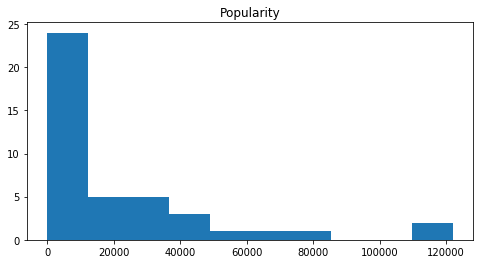

In [468]:
plt.subplots(figsize=(8, 4))
plt.hist(govtPop.popularity);
plt.title('Popularity');

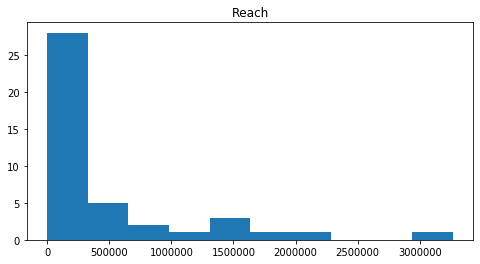

In [469]:
plt.subplots(figsize=(8, 4))
plt.hist(govtReach.reach);
plt.title('Reach');

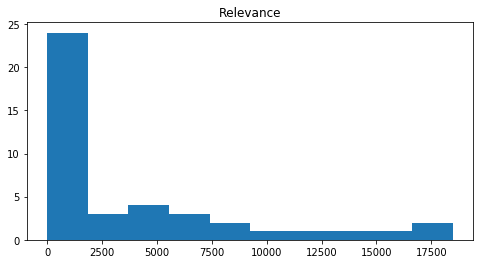

In [470]:
plt.subplots(figsize=(8, 4))
plt.hist(govtRelevance.relevance);
plt.title('Relevance');

>> From the above, there is no normal distribution.. 

>> hence we cannot just find the if there is a correlation among them (_pearon correlation works for normally ditributed data_), 

> To calcualte the correlation between these (sorted) data points:, 
- we have to make them ordinal by assigning rank to them 
- then use spearman correlation  to find the correlation coefficient between them 

In [471]:
govtPop.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
26,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7090,352,1505330,3451,2,24,21,106152,15905,122057,1504978,15926
13,1164801318742982656,Abdalla Hamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,369867,329,1,1,7,102936,17078,120014,369752,17085


In [472]:
govtPop['ranking'] = [i+1 for i in range(len(govtPop.index))]
govtPop.head(1)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
26,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7090,352,1505330,3451,2,24,21,106152,15905,122057,1504978,15926,1


In [473]:
govtReach['ranking'] = [i+1 for i in range(len(govtReach.index))]

In [474]:
govtReach.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
32,2936714848,Muhammadu Buhari,MBuhari,This is the official account of Muhammadu Buha...,4734,26,3268955,2034,2,1,0,69304,14460,83764,3268929,14460,1
10,37601149,Paul Kagame,PaulKagame,"President of the Republic of Rwanda, write to:...",2861,181,1981754,4092,0,0,2,22794,5116,27910,1981573,5118,2


In [475]:
govtRelevance['ranking'] = [i+1 for i in range(len(govtRelevance.index))]

In [476]:
govtRelevance.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
17,337183326,Amb. Willy Nyamitwe,willynyamitwe,Ambassador & Senior Advisor to HE @GeneralNeva...,40665,4654,107296,3287,12,135,354,6461,18140,24601,102642,18494,1
13,1164801318742982656,Abdalla Hamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,369867,329,1,1,7,102936,17078,120014,369752,17085,2


> Let's fimd the correlation coeeficient betweent these measure

>> Emphasis would be placed on the correlation between `popularity` & `relevance`

>> This is because reach which is measured by followership does not necessariy indicate influence

>> This would help us avoid the `million folower fallacy` discussed in the reserach paper link above

- correlation between reach and relevance

In [530]:
reach_rev_corr = pd.DataFrame(govtReach.reach.values.tolist(), govtRelevance.relevance.values.tolist()).reset_index()

In [531]:
reach_rev_corr=reach_rev_corr.rename(columns={'index':'reach', 0: 'relevance'})

In [532]:
reach_rev_corr.corr(method='spearman') 

,reach,relevance
reach,1.0,1.0
relevance,1.0,1.0


In [533]:
spearmanr(reach_rev_corr)

SpearmanrResult(correlation=1.0, pvalue=0.0)

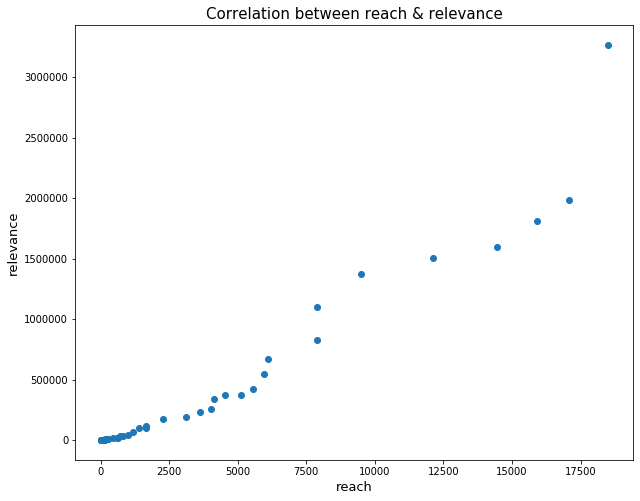

In [552]:
plt.subplots(figsize=(10,8))
plt.scatter(x=reach_rev_corr.reach, y=reach_rev_corr.relevance, marker='o')
plt.title('Correlation between reach & relevance', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/reach_rel_corr.png', format='png')
plt.show()

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` also they are strictly increasing

- correlation between reach and popularity

In [567]:
reach_pop_corr = pd.DataFrame(govtReach.reach.values.tolist(), govtPop.popularity.values.tolist()).reset_index()

In [568]:
reach_pop_corr=reach_pop_corr.rename(columns={'index':'reach', 0: 'popularity'})

In [569]:
reach_pop_corr.corr(method='spearman 

,reach,popularity
reach,1.0,1.0
popularity,1.0,1.0


In [570]:
spearmanr(reach_pop_corr) 

SpearmanrResult(correlation=1.0, pvalue=0.0)

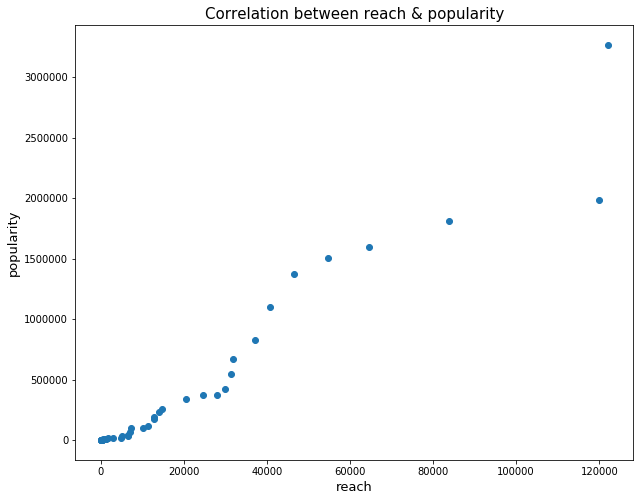

In [571]:
plt.subplots(figsize=(10,8))
plt.scatter(x=reach_pop_corr.reach, y=reach_pop_corr.popularity, marker='o')
plt.title('Correlation between reach & popularity', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.savefig(fname='savedCharts/reach_pop_corr.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`relevance` and `popularity` also they are strictly increasing

- correlation between relevance and popularity

In [572]:
rev_pop_corr = pd.DataFrame(govtPop.popularity.values.tolist(), govtRelevance.relevance.values.tolist()).reset_index()

In [573]:
rev_pop_corr=rev_pop_corr.rename(columns={'index':'popularity', 0: 'relevance'})

In [574]:
rev_pop_corr.corr(method='spearman')

,popularity,relevance
popularity,1.0,1.0
relevance,1.0,1.0


In [575]:
spearmanr(reach_rev_corr)

SpearmanrResult(correlation=1.0, pvalue=0.0)

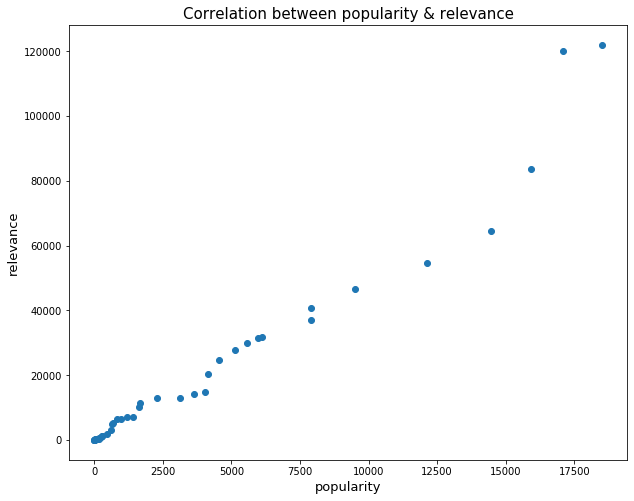

In [576]:
plt.subplots(figsize=(10,8)) 
plt.scatter(x=rev_pop_corr.popularity, y=rev_pop_corr.relevance, marker='o')
plt.title('Correlation between popularity & relevance', fontsize=15)
plt.xlabel('popularity', fontsize=13)  
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/pop_rev_corr.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` also they are strictly increasing

> Top 10 Influnetial African Personalities/Brands

<a id="r2"></a>

#### Research Question 2: 

> '''

<a id="r3"></a>


#### Research Question 3: 
> '''

<a id="gi"><gi/>

### General Insights

<a id="rc"><rc/>

### Recommendations & Conclusions

<a id="lim"><lim/>

### Limitations


<a id="ref"><ref/>
### References 


- Spearman Rank Correlation Coefficient

https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046

https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/ 

<a href="#top">Back to top</a>

In [ ]:
status = tweet if 'extended_tweet' in status._json: status_json = status._json['extended_tweet']['full_text'] elif 'retweeted_status' in status._json and 'extended_tweet' in status._json['retweeted_status']: status_json = status._json['retweeted_status']['extended_tweet']['full_text'] elif 'retweeted_status' in status._json: status_json = status._json['retweeted_status']['full_text'] else: status_json = status._json['full_text'] print(status_json)'